# Python Plotting with Subplots 

## Homework for Week 02 (Tue 19 Jan 2016)

You will use the code provided below which mines the ESRL(NOAA/NWS) data server for the daily weather in Boulder Colorado for 2012. With this data you will create a vertically layed out subplot with two plots which will be described below. 

We will be looking at:

1. <a href="#goal">Our Goal: Plotting With Subplots.</a>
2. <a href="#gallery">Matplotlib Gallery.</a>
3. <a href="#esrlcode">Mining ESRL 2012 temperature data python code.</a>
4. <a href="#mmean">Monthly mean temperatures.</a>
5. <a href="#subplots">Subplots.</a>
6. <a href="#hw_code">Enter your code below.</a>


<a id="goal">
### Our Goal: Plotting With Subplots</a>

* Matplotlib Gallery
* Create a vertical subplot layout with two plots
* The top plot will be a scatter plot of 'Daily Maximum Temperatures' along with the average daily temperature.
* The bottom plot will be a bar plot of 'Average of Daily High Temperature Binned by Month' along with the average monthly temperature.


<a id="gallery">
### Matplotlib Gallery</a>
Pythons matplotlib is extensive and contains all the plotting functionality Matlab has plus more. Its nearly impossible to remember it all so your best friend is (or will be) the matplotlib galley (http://matplotlib.org/gallery.html). 

Assume you want some guidance in creating a subplot so go to matplotlib's gallery page (http://matplotlib.org/1.2.1/gallery.html). 
Using the 'Quick Search' type in 'subplot' then hit 'Go'
Note that there are two really promising links that result from our search.
'matplotlib.pyplot.subplot' and 'Our Favorite Recipies' both give you a quick start on creating subplots. Note the first link gives you the actual function documentation as well as an example!

Its suggested you look in the gallery for the following subjects.

* Subplot
* plot_date
* Bar plot


<a id="esrl code">
### Mining ESRL 2012 temperature data python code</a>

You will start off by using the provided python code which will access the ESRL data server to retrieve and extract weather information for Boulder weather statistics. It will then extract all the temperature data for 2012 and provide variables containing the full dataset for 2012, the average maximum temperatures as well as the daily minimum and maximum temperatures.

In [2]:
%matplotlib inline   

import urllib2
import StringIO 
import itertools 
import datetime
import numpy as np

#### Reading the data as text to explore the data set

In [3]:
# Define the URL and load the raw data from ESRL
boulder_url  = "http://www.esrl.noaa.gov/psd/boulder/data/boulderdaily.complete"
dres  = urllib2.urlopen(boulder_url)
dall = StringIO.StringIO(dres.read())
dall.readline()

' Please read information at bottom of file before using\n'

In [4]:
txtdata = dall.readlines()
txtdata[-20:]

[' 2015 12 26     28     14    0.14     2.6      5\n',
 ' 2015 12 27     27      5    0.00     0.0      5\n',
 ' 2015 12 28     31      4    0.00     0.0      4\n',
 ' 2015 12 29     27      9    0.00     0.0      3\n',
 ' 2015 12 30     30      7    0.00     0.0      3\n',
 ' 2015 12 31     31      6    0.00     0.0      3\n',
 ' Data is at http://www.esrl.noaa.gov/psd/boulder/\n',
 ' Data MAY have transcription\n',
 ' errors at original source\n',
 '  \n',
 ' Format: year, mon, day, tmax, tmin, precip, snow, snowcover\n',
 ' units: degF for temperature; inches precip and snow\n',
 ' precipitation is precise to 1/100 inch\n',
 ' snowfall is precise to 1/10 inch\n',
 ' depth of snow on the ground (snowcover) is precise \n',
 ' to the nearest inch\n',
 ' temperature is precise to 1 degree\n',
 '  \n',
 ' See webpage for more details\n',
 ' This file produced by CAS AT NOAA/ESRL PSD\n']

### Reading and Transforming the Data

Format: year, mon, day, tmax, tmin, precip, snow, snowcover

Units: degF for temperature; inches precip and snow

Read the data into a `ndarray` of structured data type see: http://docs.scipy.org/doc/numpy-1.10.1/user/basics.rec.html

In [5]:
# Define the URL and load the raw data from ESRL
boulder_url  = "http://www.esrl.noaa.gov/psd/boulder/data/boulderdaily.complete"
dres  = urllib2.urlopen(boulder_url)
dall = StringIO.StringIO(dres.read())

col_dtypes= [('ymd', int, 3),
             ('tmax', float),
             ('tmin', float),
             ('pcep', float),
             ('snow', float),
             ('scvr', float),
            ]

# Filter out only data from 2012
year = "2012"

# Slurp in the data
data = np.genfromtxt(itertools.ifilter(lambda x: x.strip().startswith(year), dall),
                     dtype=col_dtypes,
                     filling_values=(-999))

print(type(data))
print(data.shape)
print(data.dtype)
print(data.dtype.names)
print(data[0])

<type 'numpy.ndarray'>
(366,)
[('ymd', '<i8', (3,)), ('tmax', '<f8'), ('tmin', '<f8'), ('pcep', '<f8'), ('snow', '<f8'), ('scvr', '<f8')]
('ymd', 'tmax', 'tmin', 'pcep', 'snow', 'scvr')
([2012, 1, 1], 35.0, 19.0, 0.0, 0.0, 2.0)


#### Extract the data we want

* dates
* Temperature


In [6]:
print("Last line of the data {0}".format(data[-1]))

def cdate(x):
    return datetime.datetime(int(x[0]), int(x[1]), int(x[2]))

#dates = np.array([cdate(x) for x in data['ymd']])  #Date values
dates = map(cdate, data['ymd'])


print(dates[-1])

tmax_avg = np.mean(data['tmax']) #Average Daily Temperature
tmax_low = np.amin(data['tmax']) #Daily Low Temperature
tmax_hig = np.amax(data['tmax']) #Daily Maximum Temperature

print("Average max temperature: {0}".format(tmax_avg))
print("Minimum max temperature: {0}".format(tmax_low))
print("Maximum max temperature: {0}".format(tmax_hig))


Last line of the data ([2012, 12, 31], 28.0, 10.0, 0.01, 0.1, 3.0)
2012-12-31 00:00:00
Average max temperature: 69.131147541
Minimum max temperature: 25.0
Maximum max temperature: 102.0


<a id="mmean">
### Monthly mean temperatures</a>

For our bottom plot you will use the calculated monthly average of the daily maximum temperatures. Since each month has a different number of days the code iterates over an array to calculate the mean temperature for each month.


In [7]:
m=0
mnthMean = [] 
mnthStd = []
mnthMax = []
mnthMin = []

mnths = np.array([31,29,31, 30, 31, 30, 31, 31, 30, 31,30,31])  # Number of days in each month
monthArr = [i for i in range(0,12)]

#Calculate the monthly means
for i in monthArr:
    monthDat = data['tmax'][m:m+mnths[i]]
    mnthMean.append(np.mean(monthDat))
    mnthStd.append(np.std(monthDat))
    mnthMax.append(np.max(monthDat))
    mnthMin.append(np.min(monthDat))
    m = m+mnths[i]
 
print("Average minimum temperaturs for each month: {0}".format(mnthMin))
print("Average minimum temperaturs for each month: {0}".format(mnthMax))
mnthDiff=np.array(mnthMax)-np.array(mnthMin)
print("Difference between average minimum and maximum temperaturs for each month: {0}".format(mnthDiff))

Average minimum temperaturs for each month: [32.0, 27.0, 35.0, 40.0, 47.0, 78.0, 75.0, 80.0, 65.0, 36.0, 36.0, 25.0]
Average minimum temperaturs for each month: [69.0, 62.0, 81.0, 87.0, 89.0, 102.0, 100.0, 96.0, 94.0, 85.0, 73.0, 71.0]
Difference between average minimum and maximum temperaturs for each month: [ 37.  35.  46.  47.  42.  24.  25.  16.  29.  49.  37.  46.]


<a id="subplots">
### Creating Subplots</a>
Python subplots allow you to add more then one plot per figure. 

You want to create a plot that has two vertically stacked panels in it. 

* The top panel will produce a scatter plot of the 'Daily Maximum Temperatures' (this is part of your title for the plot, whats the second part of the title if you wish to tell people what you are plotting?) The x-axis will be the data for each day of the year. The x-axis labels should be the 3-letter abbreviation for each month appropriately spaced and not each actual date. The y-axis will be the maximum temperature for each day. Add a line plot of the average daily temerature for the full year. It is highly recommended that you look at a plot called 'plot_date' to most easily plot your data. 

* The bottom plot is a bar plot which you will title 'Average of Daily High Temperature Binned by Month' (again only part of the title, whats the second part?) The bar plot should include error bars indicating the standard deviation of temperature for each month. Add a line plot of the average monthly temperature for the full year. The axis labeling will be basically the same as the above plot.

* Make sure you include proper axis labels, including any relavent units. Add appropriate legends. Make sure the font sizes are easily readable.

* When finsihed submit your completed and working Notebook to the 'Week 02: Homework' Dropbox on D2L.



<a id="hw_code">
### Add your code in the cell below:</a>


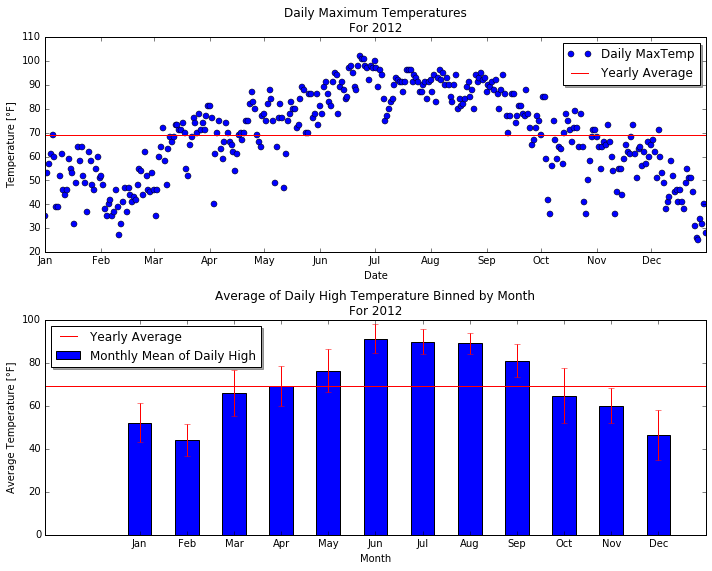

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(1,dpi=300,figsize=(10,8)) 

lMnths=('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec') # x-axis labels
numMonths = np.shape(mnthMean)[0]
nMnths = np.arange(numMonths)                    # x-axis
width = 0.5                                                  # Bar width
plt.xticks(rotation='vertical')


ax1 = plt.subplot(2,1,1)
# Create top panel
#ax1.scatter(dates, data['tmax'],label='Daily MaxTemp')
ax1.plot_date(dates, data['tmax'],label='Daily MaxTemp')
ax1.axhline(tmax_avg, color='r',label='Yearly Average')
ax1.set_title('Daily Maximum Temperatures\nFor 2012') 
ax1.set_xlabel('Date')
ax1.set_ylabel(u'Temperature [°F]')
ax1.set_xticklabels(lMnths)
ax1.legend(loc='best',fontsize=12,shadow=True)


# Create bottom panel
ax2 = plt.subplot(2,1,2)
ax2.bar(nMnths,mnthMean,yerr=mnthStd,ecolor='r',width=0.5,align='center',label='Monthly Mean of Daily High')
ax2.axhline(tmax_avg, color='r',label='Yearly Average')
ax2.set_xticklabels(lMnths)
ax2.set_xticks(nMnths)

plt.title('Average of Daily High Temperature Binned by Month\nFor 2012')
plt.xlabel('Month')
plt.ylabel(u'Average Temperature [°F]')
ax2.legend(loc='best',fontsize=12,shadow=True)


#Save the figure to disk
plt.savefig('Tmp')
plt.tight_layout()

#Show the plot
plt.show()
